In [1]:
import keras
import numpy
import matplotlib.pyplot as plotter
import PIL
import json
import time
import tensorflow

In [14]:
Predict_2K = True
density_file = "4829.txt"

density_map = numpy.full((1, 224, 224, 1), 0)

if Predict_2K:
    density_map[0,:,:,0] = numpy.loadtxt("Density_2K/" + density_file)
else:
    density_map[0,:,:,0] = numpy.loadtxt("Density_1K/" + density_file)

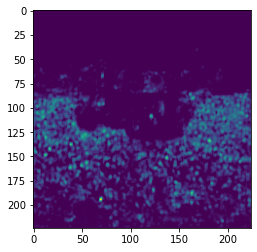

In [15]:
# Create the density map
density = numpy.full((224, 224, 3), 0)

density[:,:,1] = density_map[0][:,:,0]

plotter.imshow(density_map[0][:,:,0])

In [16]:
model = keras.Sequential()

model.add(keras.layers.Input((224, 224, 1)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(4028, activation="relu"))
model.add(keras.layers.Dense(4028, activation="relu"))
model.add(keras.layers.Dense(4028, activation="relu"))
model.add(keras.layers.Dense(1, activation="relu"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 4028)              202112956 
_________________________________________________________________
dense_5 (Dense)              (None, 4028)              16228812  
_________________________________________________________________
dense_6 (Dense)              (None, 4028)              16228812  
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 4029      
Total params: 234,574,609
Trainable params: 234,574,609
Non-trainable params: 0
_________________________________________________________________


In [17]:
if Predict_2K:
    model.load_weights("2k_counting_weights.h5")
else:
    model.load_weights("1k_counting_weights.h5")

In [18]:
result = model.predict(density_map)

In [19]:
print("Predicted: ", result[0,0])

Predicted:  2465.549
